## Urban-Heat-Island-Effekt Quantifizierung mittels Zeitreihenanalyse, Kiel

> author: Lydia Skripnik
> 
> area: Kiel
> 
> date: 26.08.2024

### Einleitung
In diesem Skript werden in einer Zeitreihenanalyse die Datensätze von zwei Messstationen miteinander verglichen. Die Bearbeitung erfolgte größtenteils mithilfe der "Statistics and Geodata Analysis using Python (SOGA-Py)"-Skripte der Freien Universität Berlin¹. Die Klimadaten wurden von der Seite des Deutschen Wetterdienstes (DWD) heruntergeladen². Dort gibt es zudem Datensätze vieler weiterer Messstationen. Für die Analyse wurde zum Einen die Station Kiel-Holtenau ausgesucht, welche im Norden Kiels an der Kieler Förde verortet ist. Die andere Station ist Leuchtturm Kiel, welche ca. 7 Kilometer von der Küste entfernt in der Nordsee liegt. Die Standorte sowie weitere Informationen kann man in den Metadaten in der heruntergeladenen Zip-Datei vom DWD nachschauen.

In der Analyse werden die folgenden Hypothesen untersucht:

1. In der Stadt ist die Lufttemperatur durchschnittlich höher als auf dem Meer.
3. Die durchschnittliche Windgeschwindigkeit ist auf dem Meer höher als in der Stadt.

### Datenvorbereitung
Verschaffen wir uns zunächst einen Überblick über den Datensatz. Damit der Import der Daten funktioniert, müssen sie im gleichen Verzeichnis wie das Notebook liegen. Das aktuelle Verzeichnis des Notebooks können wir mithilfe der "os.getcwd()"-Methode überprüfen. Die "pd.read_csv()"-Funktion zum Einlesen der Daten funktioniert auch mit txt-Dateien. Zusätzlich definieren wir innerhalb der Funktion das Semikolon als Trennungszeichen, da dies der Separator in der Datei ist. Außerdem sollte man darauf achten, dass die Schrägstriche in die korrekte Richtung zeigen. 

In [1]:
# Einladen der nötigen Module
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/marie-christineckert/Nextcloud/TU/Lehre/SoSe_2024/Jupyter-reader-hausarbeiten_2024/contents/tsa/Skripnik'

In [3]:
Kiel_Leuchtturm = pd.read_csv('C:/Users/Lyskri/Documents/KI Hausarbeit/Klimadaten_Leuchtturm.txt', sep = ';')

Kiel_Leuchtturm 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Lyskri/Documents/KI Hausarbeit/Klimadaten_Leuchtturm.txt'

Man sieht, dass der Datensatz aus 550 Zeilen (Tagen) und 19 Spalten besteht. Standardmäßig werden bei großen Datensätzen nur die ersten und letzten fünf Zeilen ausgegeben. Außerdem ist der Datensatz nach dem Datum aufsteigend geordnet. Als nächstes benennen wir die Spalten mit eindeutigen Namen und löschen dann jene Spalten, die wir für unsere Analyse nicht brauchen. Am Ende bleiben die folgenden Daten übrig³:


**TN** - Minimum der Temperatur in 2 m über dem Erdboden Grad C TIII des Vortages 
   bis TIII 23:51 Vortag - 23:50 UTC <br>
**TM** - Mittel der Temperatur in 2 m über dem Erdboden Grad C (TI+TII+2*TIII) / 4 
    Mittel aus 24 Terminwerten <br>
**TX** - Maximum der Temperatur in 2 m über dem Erdboden Grad C TIII des Vortages 
    bis TIII 23:51 Vortag - 23:50 UTC <br>
**FM** - Mittel der Windstärke m/sec (TI+TII+TIII)/3 Mittel aus 24 Terminwerten <br>
**FX** - Maximum der Windgeschwindigkeit (Spitzenböe) m/sec 00 – 23:59 UTC 23:51 Vortag - 23:50 UTC <br>

In [8]:
Kiel_Leuchtturm.columns = ['STAT','Date', 'QN_3', 'FX', 'FM', 'QN_4', 'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TM', 'UPM', 'TX', 'TN', 'TG', 'eor']

Kiel_Leuchtturm

,STAT,Date,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TM,UPM,TX,TN,TG,eor
0,2961,20230113,10,26.4,16.0,3,-999,-999,0.000,-999,-999,8.4,993.80,7.8,79.00,10.7,6.6,-999,eor
1,2961,20230114,10,22.5,13.9,3,-999,-999,0.000,-999,-999,8.6,996.70,6.9,86.00,8.9,5.7,-999,eor
2,2961,20230115,10,32.6,18.5,3,-999,-999,1.100,-999,-999,7.1,986.40,5.9,76.00,6.6,3.7,-999,eor
3,2961,20230116,10,16.9,10.9,3,-999,-999,2.200,-999,-999,6.8,983.80,4.9,79.00,5.4,4.2,-999,eor
4,2961,20230117,10,22.3,11.7,3,-999,-999,2.100,-999,-999,6.2,977.10,2.8,83.00,5.2,0.9,-999,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2961,20240711,1,10.0,5.4,1,-999,-999,11.333,-999,-999,15.9,1012.60,18.8,73.46,23.0,16.3,-999,eor
546,2961,20240712,1,19.7,7.5,1,-999,-999,7.467,-999,-999,16.9,1008.98,17.9,82.42,21.0,15.4,-999,eor
547,2961,20240713,1,15.1,9.7,1,-999,-999,1.167,-999,-999,15.3,1005.19,16.2,83.25,18.6,14.1,-999,eor
548,2961,20240714,1,22.6,9.3,1,-999,-999,8.633,-999,-999,14.0,1007.94,16.5,75.46,20.9,13.9,-999,eor


In [9]:
Kiel_Leuchtturm = Kiel_Leuchtturm.drop(columns=['STAT','QN_3','QN_4','RSK','RSKF','SHK_TAG','NM','eor','TG', 'PM', 'SDK', 'VPM', 'UPM'])

Kiel_Leuchtturm

,Date,FX,FM,TM,TX,TN
0,20230113,26.4,16.0,7.8,10.7,6.6
1,20230114,22.5,13.9,6.9,8.9,5.7
2,20230115,32.6,18.5,5.9,6.6,3.7
3,20230116,16.9,10.9,4.9,5.4,4.2
4,20230117,22.3,11.7,2.8,5.2,0.9
...,...,...,...,...,...,...
545,20240711,10.0,5.4,18.8,23.0,16.3
546,20240712,19.7,7.5,17.9,21.0,15.4
547,20240713,15.1,9.7,16.2,18.6,14.1
548,20240714,22.6,9.3,16.5,20.9,13.9


Bei dem zweiten Datensatz gehen wir die vorherigen Schritte erneut durch.

In [11]:
Kiel_Holtenau = pd.read_csv('C:/Users/Lyskri/Documents/KI Hausarbeit/Klimadaten_Holtenau.txt', sep = ';')

Kiel_Holtenau

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,2564,20230113,10,17.4,7.8,9,3.6,6,-999,0,6.3,8.9,994.10,8.0,83.00,11.0,7.3,5.2,eor
1,2564,20230114,10,16.5,6.5,9,8.0,6,-999,0,7.0,9.1,996.80,7.5,87.00,10.2,6.4,4.7,eor
2,2564,20230115,10,24.8,8.4,9,2.9,6,-999,0,6.5,7.5,987.00,6.3,78.00,8.0,4.8,2.8,eor
3,2564,20230116,10,12.5,4.8,9,2.7,6,-999,0,7.3,7.2,983.30,5.3,81.00,6.3,4.1,2.5,eor
4,2564,20230117,10,16.1,5.3,9,1.5,8,-999,0,5.5,6.5,977.30,2.8,87.00,5.7,0.7,-1.1,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2564,20240711,1,8.6,3.3,1,0.0,0,-999,0,5.8,16.1,1012.16,19.1,73.67,23.5,14.8,12.8,eor
546,2564,20240712,1,11.7,4.1,1,0.6,6,-999,0,5.9,17.3,1008.42,17.6,86.13,20.6,12.8,8.9,eor
547,2564,20240713,1,10.9,4.3,1,1.4,6,-999,0,7.3,15.6,1004.86,16.3,84.25,20.2,13.8,12.6,eor
548,2564,20240714,1,15.6,4.0,1,2.5,6,-999,0,6.1,14.4,1007.60,16.7,77.38,22.3,13.0,12.0,eor


In [12]:
Kiel_Holtenau.columns = ['STAT','Date', 'QN_3', 'FX', 'FM', 'QN_4', 'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TM', 'UPM', 'TX', 'TN', 'TG', 'eor']

Kiel_Holtenau

,STAT,Date,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TM,UPM,TX,TN,TG,eor
0,2564,20230113,10,17.4,7.8,9,3.6,6,-999,0,6.3,8.9,994.10,8.0,83.00,11.0,7.3,5.2,eor
1,2564,20230114,10,16.5,6.5,9,8.0,6,-999,0,7.0,9.1,996.80,7.5,87.00,10.2,6.4,4.7,eor
2,2564,20230115,10,24.8,8.4,9,2.9,6,-999,0,6.5,7.5,987.00,6.3,78.00,8.0,4.8,2.8,eor
3,2564,20230116,10,12.5,4.8,9,2.7,6,-999,0,7.3,7.2,983.30,5.3,81.00,6.3,4.1,2.5,eor
4,2564,20230117,10,16.1,5.3,9,1.5,8,-999,0,5.5,6.5,977.30,2.8,87.00,5.7,0.7,-1.1,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2564,20240711,1,8.6,3.3,1,0.0,0,-999,0,5.8,16.1,1012.16,19.1,73.67,23.5,14.8,12.8,eor
546,2564,20240712,1,11.7,4.1,1,0.6,6,-999,0,5.9,17.3,1008.42,17.6,86.13,20.6,12.8,8.9,eor
547,2564,20240713,1,10.9,4.3,1,1.4,6,-999,0,7.3,15.6,1004.86,16.3,84.25,20.2,13.8,12.6,eor
548,2564,20240714,1,15.6,4.0,1,2.5,6,-999,0,6.1,14.4,1007.60,16.7,77.38,22.3,13.0,12.0,eor


In [13]:
Kiel_Holtenau = Kiel_Holtenau.drop(columns=['STAT','QN_3','QN_4','RSK','RSKF','SHK_TAG','NM','eor','TG', 'PM','SDK', 'VPM', 'UPM'])

Kiel_Holtenau

,Date,FX,FM,TM,TX,TN
0,20230113,17.4,7.8,8.0,11.0,7.3
1,20230114,16.5,6.5,7.5,10.2,6.4
2,20230115,24.8,8.4,6.3,8.0,4.8
3,20230116,12.5,4.8,5.3,6.3,4.1
4,20230117,16.1,5.3,2.8,5.7,0.7
...,...,...,...,...,...,...
545,20240711,8.6,3.3,19.1,23.5,14.8
546,20240712,11.7,4.1,17.6,20.6,12.8
547,20240713,10.9,4.3,16.3,20.2,13.8
548,20240714,15.6,4.0,16.7,22.3,13.0


#### Anlegen einer Spalte mit dem Datum

Bei der Ausgabe der Spalte "Date" sieht man, dass der Datentyp ("dtype") dieser Spalte aktuell Integers ("int") ist. Wir werden diese Spalte nun benutzen, um eine neue Spalte im korrektem Datumsformat anzulegen. In der "pd.to_datetime()"-Funktion geben wir das vorliegende Format der Spalte "Date" mit '%Y%m%d' an. Die neue Spalte "Datum" wird im englischen Format (Jahr-Monat-Tag) entstehen.

In [16]:
Kiel_Leuchtturm['Date']

0      20230113
1      20230114
2      20230115
3      20230116
4      20230117
         ...   
545    20240711
546    20240712
547    20240713
548    20240714
549    20240715
Name: Date, Length: 550, dtype: int64

In [17]:
Kiel_Leuchtturm['Datum'] = pd.to_datetime(Kiel_Leuchtturm['Date'],format='%Y%m%d')
Kiel_Leuchtturm.head()

,Date,FX,FM,TM,TX,TN,Datum
0,20230113,26.4,16.0,7.8,10.7,6.6,2023-01-13
1,20230114,22.5,13.9,6.9,8.9,5.7,2023-01-14
2,20230115,32.6,18.5,5.9,6.6,3.7,2023-01-15
3,20230116,16.9,10.9,4.9,5.4,4.2,2023-01-16
4,20230117,22.3,11.7,2.8,5.2,0.9,2023-01-17


In [18]:
Kiel_Leuchtturm['Datum']

0     2023-01-13
1     2023-01-14
2     2023-01-15
3     2023-01-16
4     2023-01-17
         ...    
545   2024-07-11
546   2024-07-12
547   2024-07-13
548   2024-07-14
549   2024-07-15
Name: Datum, Length: 550, dtype: datetime64[ns]

Die Überprüfung der neu angelegten Spalte "Datum" zeigt, dass der Datentyp jetzt als Datum ("datetime") festgelegt ist. Die Zahlen aus der Spalte "Date" wurden erfolgreich in ein Datumsformat transformiert. Das gleiche machen wir auch bei dem zweiten Datensatz.

In [20]:
Kiel_Holtenau['Datum'] = pd.to_datetime(Kiel_Holtenau['Date'],format='%Y%m%d')
Kiel_Holtenau.head()

,Date,FX,FM,TM,TX,TN,Datum
0,20230113,17.4,7.8,8.0,11.0,7.3,2023-01-13
1,20230114,16.5,6.5,7.5,10.2,6.4,2023-01-14
2,20230115,24.8,8.4,6.3,8.0,4.8,2023-01-15
3,20230116,12.5,4.8,5.3,6.3,4.1,2023-01-16
4,20230117,16.1,5.3,2.8,5.7,0.7,2023-01-17


In [21]:
Kiel_Holtenau['Datum']

0     2023-01-13
1     2023-01-14
2     2023-01-15
3     2023-01-16
4     2023-01-17
         ...    
545   2024-07-11
546   2024-07-12
547   2024-07-13
548   2024-07-14
549   2024-07-15
Name: Datum, Length: 550, dtype: datetime64[ns]

Die Spalte "Date" benötigen wir nicht mehr und löschen sie daher. Als letztes legen wir die Spalte "Datum" als Index der DataFrames fest. So kann man sich bestimmte Zeiträume oder Tage genauer angucken, da man diese einfach über das Datum aufrufen kann.

In [23]:
Kiel_Leuchtturm = Kiel_Leuchtturm.drop(columns=['Date'])

Kiel_Leuchtturm = Kiel_Leuchtturm.set_index('Datum')

In [24]:
Kiel_Holtenau = Kiel_Holtenau.drop(columns=['Date'])

Kiel_Holtenau = Kiel_Holtenau.set_index('Datum')

In [25]:
Kiel_Leuchtturm

,FX,FM,TM,TX,TN
Datum,,,,,
2023-01-13,26.4,16.0,7.8,10.7,6.6
2023-01-14,22.5,13.9,6.9,8.9,5.7
2023-01-15,32.6,18.5,5.9,6.6,3.7
2023-01-16,16.9,10.9,4.9,5.4,4.2
2023-01-17,22.3,11.7,2.8,5.2,0.9
...,...,...,...,...,...
2024-07-11,10.0,5.4,18.8,23.0,16.3
2024-07-12,19.7,7.5,17.9,21.0,15.4
2024-07-13,15.1,9.7,16.2,18.6,14.1


In [26]:
Kiel_Holtenau

,FX,FM,TM,TX,TN
Datum,,,,,
2023-01-13,17.4,7.8,8.0,11.0,7.3
2023-01-14,16.5,6.5,7.5,10.2,6.4
2023-01-15,24.8,8.4,6.3,8.0,4.8
2023-01-16,12.5,4.8,5.3,6.3,4.1
2023-01-17,16.1,5.3,2.8,5.7,0.7
...,...,...,...,...,...
2024-07-11,8.6,3.3,19.1,23.5,14.8
2024-07-12,11.7,4.1,17.6,20.6,12.8
2024-07-13,10.9,4.3,16.3,20.2,13.8


#### Aufteilen der Daten in einen Jahresverlauf

Im nächsten Schritt benutzen wir den Index, um die vorhandene Zeitreihe in einen neuen DataFrame mit einem Zeitraum von einem Jahr aufzuteilen. Die Daten gehen vom 13.01.2023 bis zum 15.07.2024, also suchen wir uns den Zeitraum vom 01.02.2023 bis zum 31.01.2024 aus.

In [29]:
KL_jahr = Kiel_Leuchtturm['2023-02-01':'2024-01-31']

KH_jahr = Kiel_Holtenau['2023-02-01':'2024-01-31']

In [30]:
KL_jahr

,FX,FM,TM,TX,TN
Datum,,,,,
2023-02-01,26.2,15.4,5.4,6.6,2.3
2023-02-02,16.4,7.6,5.1,10.1,3.5
2023-02-03,27.9,16.2,6.2,8.3,3.4
2023-02-04,11.3,6.1,2.2,3.6,0.0
2023-02-05,12.2,6.9,1.1,4.7,-0.9
...,...,...,...,...,...
2024-01-27,16.1,10.4,5.4,7.0,3.9
2024-01-28,13.1,7.9,4.3,6.7,1.9
2024-01-29,12.6,7.2,6.1,7.9,4.3


In [31]:
KH_jahr

,FX,FM,TM,TX,TN
Datum,,,,,
2023-02-01,20.6,8.9,6.1,7.3,4.1
2023-02-02,11.9,4.3,5.5,7.2,4.1
2023-02-03,22.0,9.3,6.8,8.5,3.6
2023-02-04,8.8,2.8,2.3,4.2,0.0
2023-02-05,9.0,3.1,0.8,2.2,-0.7
...,...,...,...,...,...
2024-01-27,13.0,5.5,5.3,7.1,2.7
2024-01-28,8.7,3.6,4.0,7.4,0.9
2024-01-29,7.8,3.4,6.3,9.1,3.9


Mit der "describe()"-Funktion kann man sich statistische Werte des ausgewählten Zeitraumes anzeigen lassen. Wir haben die Daten von 365 Tagen ("count") und den Mittelwert ("mean"), höchsten Wert ("max") und niedrigsten Wert ("min") für jeden Parameter. Dazu werden noch die 25%, 50% (gleichzusetzen mit dem Median) und 75% Perzentile angezeigt, die Aufschluss über die Verteilung der Datenmengen geben. Bei aufsteigend geordneten Werten würden zum Beispiel 25% der gemessenen Werte von "FX" unter 11.6 m/sec, 50% unter 15.3 m/sec und 75% unter 19.5 m/sec liegen. Außerdem wird die Standardabweichung ("std") angegeben. Die Standardabweichung ist auffallend hoch bei "FX" und "FM" im Vergleich zu den anderen Werten. Dies liegt daran, dass der niedrigste Wert dort bei "-999" liegt, was wir uns im nächsten Schritt genauer ansehen werden.

In [33]:
KL_jahr.describe()

,FX,FM,TM,TX,TN
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.420000,-7.574521,10.418356,12.889315,8.176986
std,118.331061,128.400637,6.097623,6.716984,5.794680
min,-999.000000,-999.000000,-1.700000,0.000000,-5.100000
25%,11.600000,6.100000,5.700000,7.300000,3.700000
50%,15.300000,8.500000,9.600000,11.600000,7.800000
75%,19.500000,11.300000,16.100000,18.500000,13.600000
max,36.500000,24.800000,23.500000,28.500000,18.800000


In [34]:
KH_jahr.describe()

,FX,FM,TM,TX,TN
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,8.862192,4.406027,10.338904,13.825205,6.685479
std,53.091877,1.894879,6.350315,7.466498,5.831624
min,-999.000000,1.400000,-6.900000,-3.600000,-10.700000
25%,8.300000,3.000000,5.700000,8.100000,2.600000
50%,10.800000,3.900000,9.700000,12.600000,6.800000
75%,14.000000,5.300000,15.900000,20.100000,11.800000
max,28.700000,12.800000,24.000000,30.000000,17.700000


#### Umgang mit Fehlwerten

In der Ausgabe der "describe()"-Funktion haben wir soeben die "-999" als niedrigsten Wert gesehen. Da diese Zahl als Messergebnis unrealistisch ist, kann man davon ausgehen, dass der DWD die "-999" als Kennzeichnung von Fehlwerten eingesetzt hat. Im nächsten Schritt möchten wir herausfinden, wo sich die Fehlwerte im ausgewählten Zeitraum befinden. In der Antwort auf diese Frage: 
"Ich habe einen Datensatz der so aussieht: [einen kleinen DataFrame mit mindestens einer Position mit "-999" als Beispiel einfügen]. Wie kann ich mithilfe von der np.where()-Funktion alle Stellen mit -999 anzeigen lassen?" liefert ChatGPT einen Code, der anschließend für unseren Zweck angepasst wurde. Zunächst findet man mit der "np-where"-Funktion die zusammengehörenden Zeilen- und Spaltenpositionen der "-999" im Datensatz heraus. Die Ausgabe des Ergebnisses funktioniert als Schleife, die jedes Paar von Zeilen- und Spaltenindizes in den Daten durchgeht und nach der "-999" absucht. Anschließend werden der Index und der Spaltenname der gefundenen Positionen ausgegeben. Die Zeitangabe "00:00:00" kommt von dem Datentyp "datetime" des Index, die standardmäßig eine Zeitkomponente enthält. Die richtige Uhrzeit kennen wir nicht.

In [37]:
# Einladen des nötigen Moduls
import numpy as np

In [38]:
Positionen = np.where(KL_jahr == -999)

print("Positionen mit dem Wert -999:")
for row, col in zip(Positionen[0], Positionen[1]):
    print(f"{KL_jahr.index[row]}, {KL_jahr.columns[col]}")

Positionen mit dem Wert -999:
2023-08-07 00:00:00, FX
2023-10-21 00:00:00, FX
2023-10-21 00:00:00, FM
2023-10-22 00:00:00, FX
2023-10-22 00:00:00, FM
2023-10-23 00:00:00, FX
2023-10-23 00:00:00, FM
2023-10-24 00:00:00, FX
2023-10-24 00:00:00, FM
2023-10-25 00:00:00, FM
2023-11-15 00:00:00, FM


In [39]:
Positionen = np.where(KH_jahr == -999)

print("Positionen mit dem Wert -999:")
for row, col in zip(Positionen[0], Positionen[1]):
    print(f"{KH_jahr.index[row]}, {KH_jahr.columns[col]}")

Positionen mit dem Wert -999:
2023-09-25 00:00:00, FX


Dank der obigen Ausgaben wissen wir nun genau, wo sich die Fehlwerte in den Datensätzen befinden und können später kontrollieren, ob die folgenden Schritte erfolgreich waren. Die Positionen der "-999" werden nun mit "NaN" ("Not a Number") ersetzt, sodass die Fehlwerte für weitere Funktionen als solche erkannt werden. Für diesen Schritt haben wir von ChatGPT den Code als Antwort auf diese Folgefrage erhalten: "Wie können wir die -999 durch NaN ersetzen?". Die "replace()"-Funktion ersetzt normalerweise die NaN's in einer Kopie des originalen DataFrames. Dem haben wir mit dem "inplace=True" entgegengewirkt, sodass der originale DataFrame benutzt wird. Die rote Meldung können wir also ignorieren. Mit der "isnull().sum()"-Funktion überprüfen wir, ob das Ersetzen funktioniert hat und die Anzahl der Fehlwerte mit den vorherigen Ausgaben übereinstimmt. Probeweise können wir außerdem in beiden Datensätzen eine oder mehrere Position(-en) aufrufen, wo zuvor "-999" stand und schauen, ob die Zahl ersetzt wurde.

In [41]:
KL_jahr.replace(-999, np.nan, inplace=True)
KH_jahr.replace(-999, np.nan, inplace=True)

C:\Users\Lyskri\AppData\Local\Temp\ipykernel_16704\1939941203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KL_jahr.replace(-999, np.nan, inplace=True)
C:\Users\Lyskri\AppData\Local\Temp\ipykernel_16704\1939941203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KH_jahr.replace(-999, np.nan, inplace=True)


In [42]:
KL_jahr.isnull().sum()

FX    5
FM    6
TM    0
TX    0
TN    0
dtype: int64

In [43]:
KH_jahr.isnull().sum()

FX    1
FM    0
TM    0
TX    0
TN    0
dtype: int64

In [44]:
KL_jahr['2023-10-21':'2023-10-25']

,FX,FM,TM,TX,TN
Datum,,,,,
2023-10-21,NaN,NaN,9.0,11.5,6.3
2023-10-22,NaN,NaN,11.7,13.8,9.5
2023-10-23,NaN,NaN,10.0,13.5,6.2
2023-10-24,NaN,NaN,10.8,11.6,7.5
2023-10-25,11.4,NaN,9.8,11.1,8.2


In [45]:
KH_jahr.loc['2023-09-25']

FX     NaN
FM     3.8
TM    15.4
TX    19.5
TN    12.2
Name: 2023-09-25 00:00:00, dtype: float64

Das Ersetzen durch NaN ist erfolgreich gewesen. Als nächstes müssen wir diese NaN's durch sinnvolle Werte füllen. Wir haben dafür die "interpolate()"-Funktion von ChatGPT als Antwort auf diese Folgefrage vorgeschlagen bekommen: "Wie können die fehlenden Tageswerte ersetzt werden?". 
Beim linearen Interpolieren wird der fehlende Wert mit dem Wert in der Mitte zwischen den benachbarten Werten aufgefüllt. Die vorhandenen Werte werden sozusagen mit einer geraden Linie verbunden. Da wir auf die Gesamtheit der 365 Werte pro Spalte nur sehr wenig Fehlwerte haben, können wir diese einfache Methode wählen, ohne dass wir die Daten stark verfälschen.

In [47]:
KL_jahr = KL_jahr.interpolate(method='linear')
KH_jahr = KH_jahr.interpolate(method='linear')

In [48]:
KL_jahr.isnull().sum()

FX    0
FM    0
TM    0
TX    0
TN    0
dtype: int64

In [49]:
KH_jahr.isnull().sum()

FX    0
FM    0
TM    0
TX    0
TN    0
dtype: int64

In [50]:
KL_jahr.describe()

,FX,FM,TM,TX,TN
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,16.416164,9.145068,10.418356,12.889315,8.176986
std,6.049522,3.922399,6.097623,6.716984,5.794680
min,5.700000,2.100000,-1.700000,0.000000,-5.100000
25%,11.800000,6.300000,5.700000,7.300000,3.700000
50%,15.600000,8.600000,9.600000,11.600000,7.800000
75%,19.900000,11.600000,16.100000,18.500000,13.600000
max,36.500000,24.800000,23.500000,28.500000,18.800000


In [51]:
KL_jahr['2023-10-20':'2023-10-26']

,FX,FM,TM,TX,TN
Datum,,,,,
2023-10-20,36.50,24.800000,8.5,9.9,6.5
2023-10-21,31.48,22.816667,9.0,11.5,6.3
2023-10-22,26.46,20.833333,11.7,13.8,9.5
2023-10-23,21.44,18.850000,10.0,13.5,6.2
2023-10-24,16.42,16.866667,10.8,11.6,7.5
2023-10-25,11.40,14.883333,9.8,11.1,8.2
2023-10-26,16.90,12.900000,10.0,11.5,8.9


In [52]:
KH_jahr['2023-09-24':'2023-09-26']

,FX,FM,TM,TX,TN
Datum,,,,,
2023-09-24,8.5,2.9,13.9,18.2,9.6
2023-09-25,7.3,3.8,15.4,19.5,12.2
2023-09-26,6.1,2.1,15.9,20.8,10.9


Die Überprüfung zeigt, dass wir keine NaN's mehr in unseren Daten haben. Das Interpolieren war erfolgreich. In den obigen Beispielen kann man außerdem nachvollziehen, wie die Fehlwerte interpoliert wurden. Im Datensatz von Leuchtturm Kiel wurden die NaN's zwischen dem 20.10.2023 und dem 26.10.2013 bei "FM" und die NaN's zwischen dem 20.10.2023 und 25.10.2023 bei "FX" und im Datensatz Kiel-Holtenau der Wert am 25.09.2023 aufgefüllt.

### Analyse und Visualisierung der Daten

In der Analyse bearbeiten wir die zwei aufgestellten Hypothesen: 
1. In der Stadt ist die Lufttemperatur durchschnittlich höher als auf dem Meer.
2. Die durchschnittliche Windgeschwindigkeit ist auf dem Meer höher als in der Stadt.

Für die Analyse der Daten müssen die beiden Datensätze der unterschiedlichen Stationen miteinander verglichen werden. Am besten stellt man dafür die erhobenen Werte eines Parameters an beiden Stationen in einem Plot dar und schaut sich daraufhin Auffälligkeiten in den Daten an. 

#### Überblick über die Daten zur Temperatur

Zunächst plotten wir zum Überblick die vorhandenen Daten zur Temperatur pro Station. In den ersten beiden Plots sieht man, dass bei den Stationen die maximale Temperatur über und die minimale Temperatur unter der mittleren Lufttemperatur liegen. Die Temperaturdaten erscheinen dementsprechend logisch. Die beiden Plots zeigen Unterschiede, die in den nächsten Schritten genauer analysiert werden.

In [58]:
# Einladen des nötigen Moduls
import matplotlib.pyplot as plt

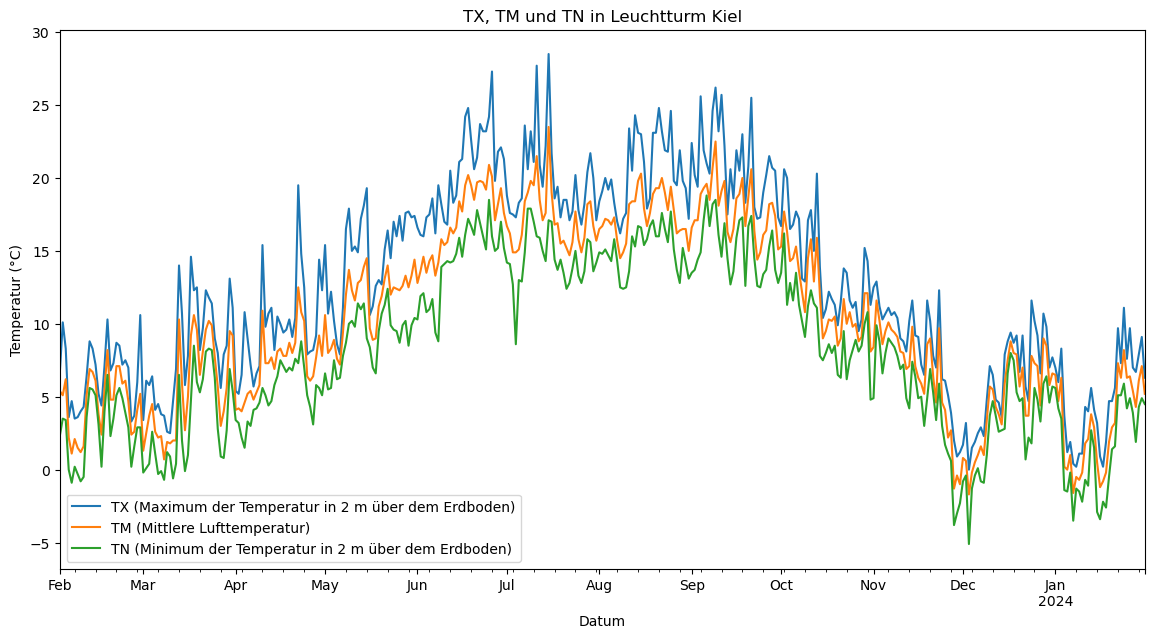

In [59]:
plt.figure(figsize=(14, 7)) 
KL_jahr[['TX', 'TM', 'TN']].plot(title='TX, TM und TN in Leuchtturm Kiel', ax=plt.gca()) 
plt.xlabel('Datum') 
plt.ylabel('Temperatur (°C)') 
plt.legend(['TX (Maximum der Temperatur in 2 m über dem Erdboden)', 'TM (Mittlere Lufttemperatur)','TN (Minimum der Temperatur in 2 m über dem Erdboden)']) 
plt.show()

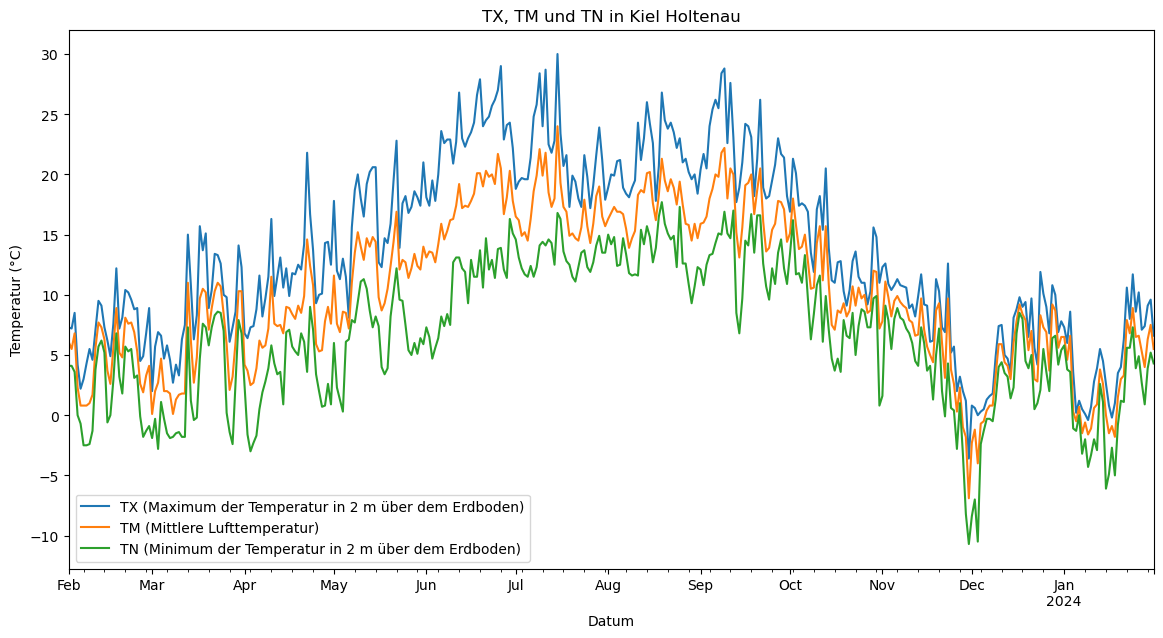

In [60]:
plt.figure(figsize=(14, 7)) 
KH_jahr[['TX', 'TM', 'TN']].plot(title='TX, TM und TN in Kiel Holtenau', ax=plt.gca()) 
plt.xlabel('Datum') 
plt.ylabel('Temperatur (°C)') 
plt.legend(['TX (Maximum der Temperatur in 2 m über dem Erdboden)', 'TM (Mittlere Lufttemperatur)', 'TN (Minimum der Temperatur in 2 m über dem Erdboden)']) 
plt.show()

#### Vergleich der Daten zur Temperatur

Für den Vergleich der beiden Datensätze plotten wir als erstes die mittlere Lufttemperatur.

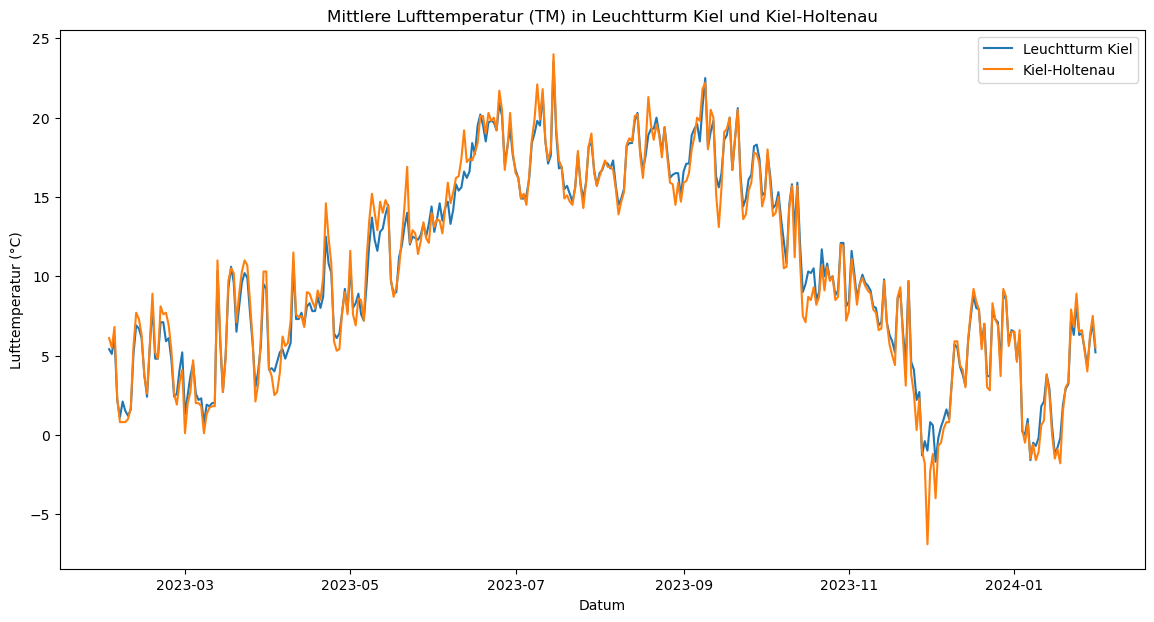

In [63]:
plt.figure(figsize=(14, 7)) 
plt.plot(KL_jahr.index, KL_jahr['TM'], label='Leuchtturm Kiel') 
plt.plot(KH_jahr.index, KH_jahr['TM'], label='Kiel-Holtenau') 
plt.title('Mittlere Lufttemperatur (TM) in Leuchtturm Kiel und Kiel-Holtenau') 
plt.xlabel('Datum') 
plt.ylabel('Lufttemperatur (°C)') 
plt.legend() 
plt.show()

Die gemessenen Werte an den Stationen scheinen über den Jahresverlauf häufig nah bei einander zu liegen. Diese Beobachtung wollen wir nun rechnerisch mit der Differenz zwischen den Werten der Stationen überprüfen. Dafür haben wir ChatGPT zwei DataFrames als Beispiele vorgegeben und gefragt: "Wie kann ich die Differenz der beiden Datensätze vergleichen?". In der Berechnung ziehen wir die Werte von der Station Leuchtturm Kiel von den Werten der Station Kiel-Holtenau ab.

In [65]:
# Berechnung der Differenz 
tm_differenz = KH_jahr['TM'] - KL_jahr['TM'].reindex(KL_jahr.index)

# Erstellen eines DataFrames mit den Originalwerten und der Differenz
tm_vergleich = pd.DataFrame({
    'Datum': KL_jahr.index,
    'TM_Leuchtturm': KL_jahr['TM'],
    'TM_Holtenau': KH_jahr['TM'].reindex(KL_jahr.index),
    'Differenz_TM': tm_differenz
})

print(tm_vergleich)

                Datum  TM_Leuchtturm  TM_Holtenau  Differenz_TM
Datum                                                          
2023-02-01 2023-02-01            5.4          6.1           0.7
2023-02-02 2023-02-02            5.1          5.5           0.4
2023-02-03 2023-02-03            6.2          6.8           0.6
2023-02-04 2023-02-04            2.2          2.3           0.1
2023-02-05 2023-02-05            1.1          0.8          -0.3
...               ...            ...          ...           ...
2024-01-27 2024-01-27            5.4          5.3          -0.1
2024-01-28 2024-01-28            4.3          4.0          -0.3
2024-01-29 2024-01-29            6.1          6.3           0.2
2024-01-30 2024-01-30            7.1          7.5           0.4
2024-01-31 2024-01-31            5.2          5.5           0.3

[365 rows x 4 columns]


In [66]:
tm_differenz.mean()

-0.07945205479452055

Das Ergebnis zeigt den Durchschnitt der berechneten Differenz. Die mittlere Lufttemperatur in Kiel Leuchtturm über den betrachteten Zeitraum war durchschnittlich um etwa 0,08°C höher als bei der Messstation Kiel-Holtenau. Die Differenz zwischen beiden Stationen ist sehr gering. Dies deutet darauf hin, dass die Temperaturen an den beiden Stationen im gewählten Zeitraum sehr änhlich waren. Damit wurde vorerst die 1. Hypothese widerlegt. Jedoch ist das Ergebnis nicht sehr aussagekräftig, was z.B. an einzelnen Ausschlägen (wie zwischen November 2023 und Januar 2024) liegen könnte. Als nächstes vergleichen wir das Maximum der Temperatur.

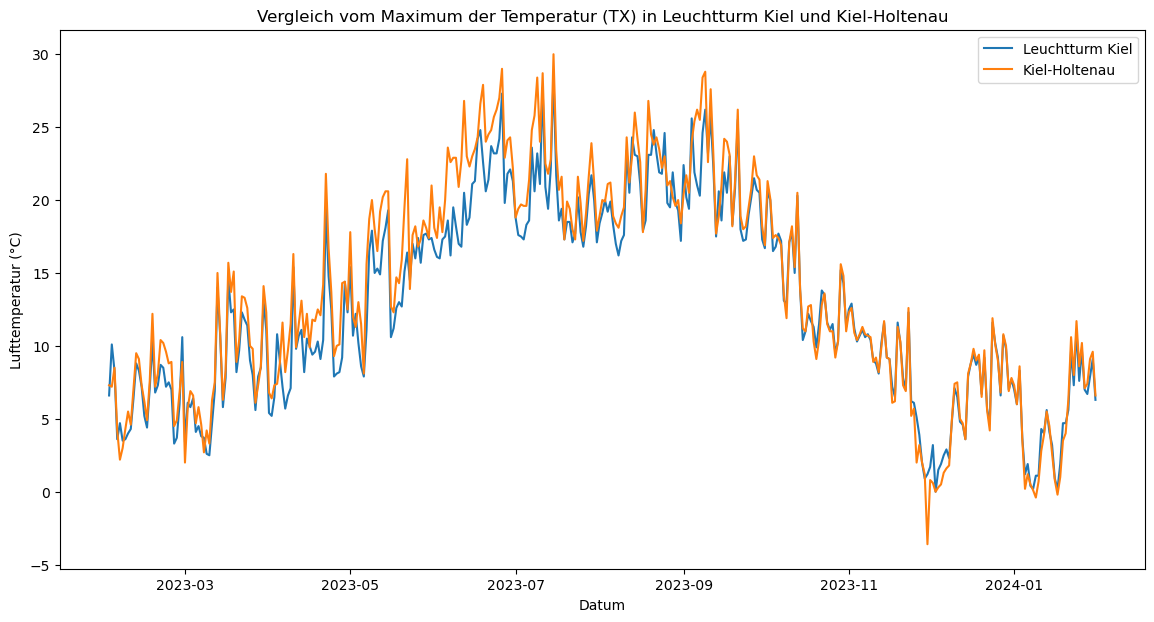

In [68]:
plt.figure(figsize=(14, 7)) 
plt.plot(KL_jahr.index, KL_jahr['TX'], label='Leuchtturm Kiel') 
plt.plot(KH_jahr.index, KH_jahr['TX'], label='Kiel-Holtenau') 
plt.title('Vergleich vom Maximum der Temperatur (TX) in Leuchtturm Kiel und Kiel-Holtenau') 
plt.xlabel('Datum') 
plt.ylabel('Lufttemperatur (°C)') 
plt.legend() 
plt.show()

Auf den ersten Blick scheinen deutlichere Unterschiede als bei der mittleren Lufttemperatur vorzuliegen. Wir überprüfen diese Beobachtung wieder mit der Berechnung.

In [70]:
tx_differenz = KH_jahr['TX'] - KL_jahr['TX'].reindex(KL_jahr.index)

tx_vergleich = pd.DataFrame({
    'Datum': KL_jahr.index,
    'TX_Leuchtturm': KL_jahr['TX'],
    'TX_Holtenau': KH_jahr['TX'].reindex(KL_jahr.index),
    'Differenz_TX': tx_differenz
})

print(tx_vergleich)

                Datum  TX_Leuchtturm  TX_Holtenau  Differenz_TX
Datum                                                          
2023-02-01 2023-02-01            6.6          7.3           0.7
2023-02-02 2023-02-02           10.1          7.2          -2.9
2023-02-03 2023-02-03            8.3          8.5           0.2
2023-02-04 2023-02-04            3.6          4.2           0.6
2023-02-05 2023-02-05            4.7          2.2          -2.5
...               ...            ...          ...           ...
2024-01-27 2024-01-27            7.0          7.1           0.1
2024-01-28 2024-01-28            6.7          7.4           0.7
2024-01-29 2024-01-29            7.9          9.1           1.2
2024-01-30 2024-01-30            9.1          9.6           0.5
2024-01-31 2024-01-31            6.3          6.6           0.3

[365 rows x 4 columns]


In [71]:
tx_differenz.mean()

0.935890410958904

Das Ergebnis zeigt den Durchschnitt der berechneten Differenz. Die maximale Lufttemperatur in Kiel-Holtenau war über den betrachteten Zeitraum durchschnittlich um etwa 0,94°C höher als bei der Messstation Leuchtturm Kiel. Die Differenz zwischen den beiden Stationen beträgt fast 1°C. Dies spricht für eine Bestätigung der 1. Hypothese. Als letztes schauen wir uns noch das Minimum der Lufttemperatur an.

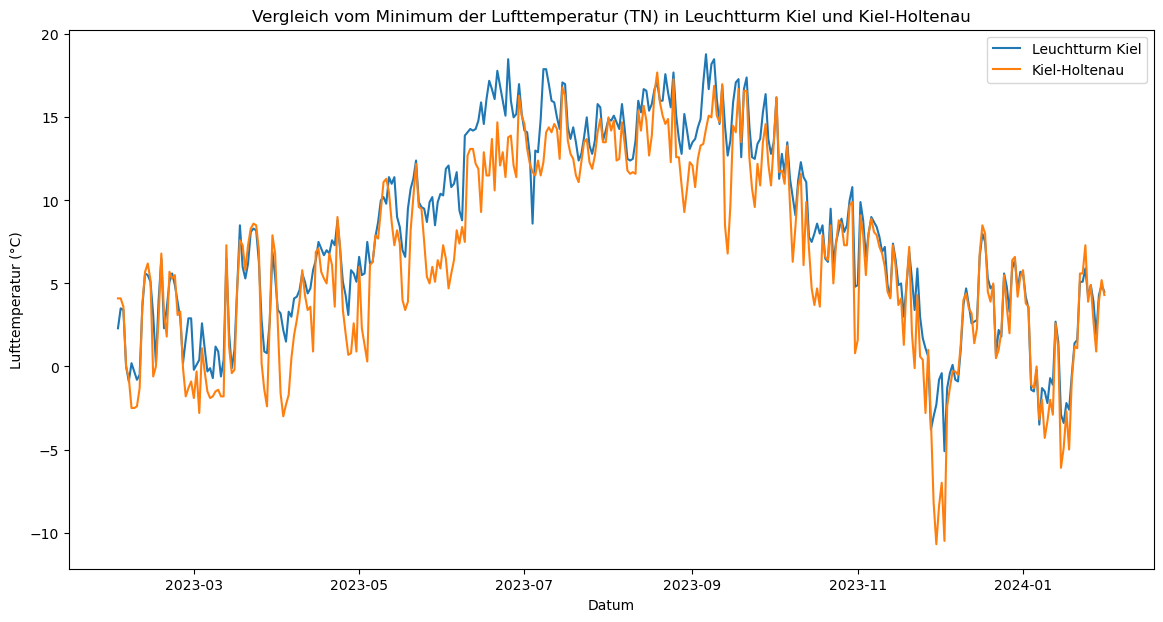

In [73]:
plt.figure(figsize=(14, 7)) 
plt.plot(KL_jahr.index, KL_jahr['TN'], label='Leuchtturm Kiel') 
plt.plot(KH_jahr.index, KH_jahr['TN'], label='Kiel-Holtenau') 
plt.title('Vergleich vom Minimum der Lufttemperatur (TN) in Leuchtturm Kiel und Kiel-Holtenau') 
plt.xlabel('Datum') 
plt.ylabel('Lufttemperatur (°C)') 
plt.legend() 
plt.show()

Hier scheinen noch deutlichere Unterschiede als bei der maximalen Lufttemperatur vorzuliegen. Wir überprüfen diese Beobachtung wieder mit der Berechnung.

In [75]:
tn_differenz = KH_jahr['TN'] - KL_jahr['TN'].reindex(KL_jahr.index)

tn_vergleich = pd.DataFrame({
    'Datum': KL_jahr.index,
    'TN_Leuchtturm': KL_jahr['TN'],
    'TN_Holtenau': KH_jahr['TN'].reindex(KL_jahr.index),
    'Differenz_TN': tn_differenz
})

print(tn_vergleich)

                Datum  TN_Leuchtturm  TN_Holtenau  Differenz_TN
Datum                                                          
2023-02-01 2023-02-01            2.3          4.1           1.8
2023-02-02 2023-02-02            3.5          4.1           0.6
2023-02-03 2023-02-03            3.4          3.6           0.2
2023-02-04 2023-02-04            0.0          0.0           0.0
2023-02-05 2023-02-05           -0.9         -0.7           0.2
...               ...            ...          ...           ...
2024-01-27 2024-01-27            3.9          2.7          -1.2
2024-01-28 2024-01-28            1.9          0.9          -1.0
2024-01-29 2024-01-29            4.3          3.9          -0.4
2024-01-30 2024-01-30            4.9          5.2           0.3
2024-01-31 2024-01-31            4.5          4.3          -0.2

[365 rows x 4 columns]


In [76]:
tn_differenz.mean()

-1.4915068493150687

Das Ergebnis zeigt den Durchschnitt der berechneten Differenz. Die minimale Lufttemperatur in Leuchtturm Kiel war über den betrachteten Zeitraum durchschnittlich um etwa 1,5°C höher als bei der Messstation Kiel-Holtenau. Dies spricht wiederum für eine Falsifizierung der 1. Hypothese.

#### Fazit zur 1. Hypothese
Abschließend kann man aus den Berechnungen schließen, dass die mittlere Lufttemperatur die Unterschiede, wie sie sich in den Berechnungen mit den Maxima und Minima der Temperatur zeigen, nicht darstellt. Die Ergebnisse unterscheiden sich je nachdem, welchen Parameter man sich anschaut. Der größte Unterschied zeigt sich bei dem Minimum der Lufttemperatur im Durchschnitt mit knapp 1,5°C höheren Temperaturen in Leuchtturm Kiel. Der Unterschied in den mittleren Lufttemperaturen liegt mit 0,08°C fast bei 0. In der Stadt ist das Maximum der Lufttemperatur durchschnittlich höher und das Minimum der Lufttemperatur durchschnittlich niedriger als auf dem Meer. Die Temperaturunterschiede sind in Kiel-Holtenau also größer als in Leuchtturm Kiel. Aufgrund der Ergebnisse lässt sich die Hypothese weder eindeutig verifizieren noch falsifizieren.

#### Überblick über die Daten zur Windgeschwindigkeit

Im zweiten Teil der Analyse schauen wir uns die Daten zur Windgeschwindigkeit an. Als Überblick plotten wir die vorhandenen Daten zur Windgeschwindigkeit pro Station. Die beiden Plots zeigen logischerweise, dass das Maximum der Windgeschwindigkeit über dem Mittel der Windstärke liegt. Die Unterschiede zwischen den beiden Stationen werden in den nächsten Schritten genauer analysiert.

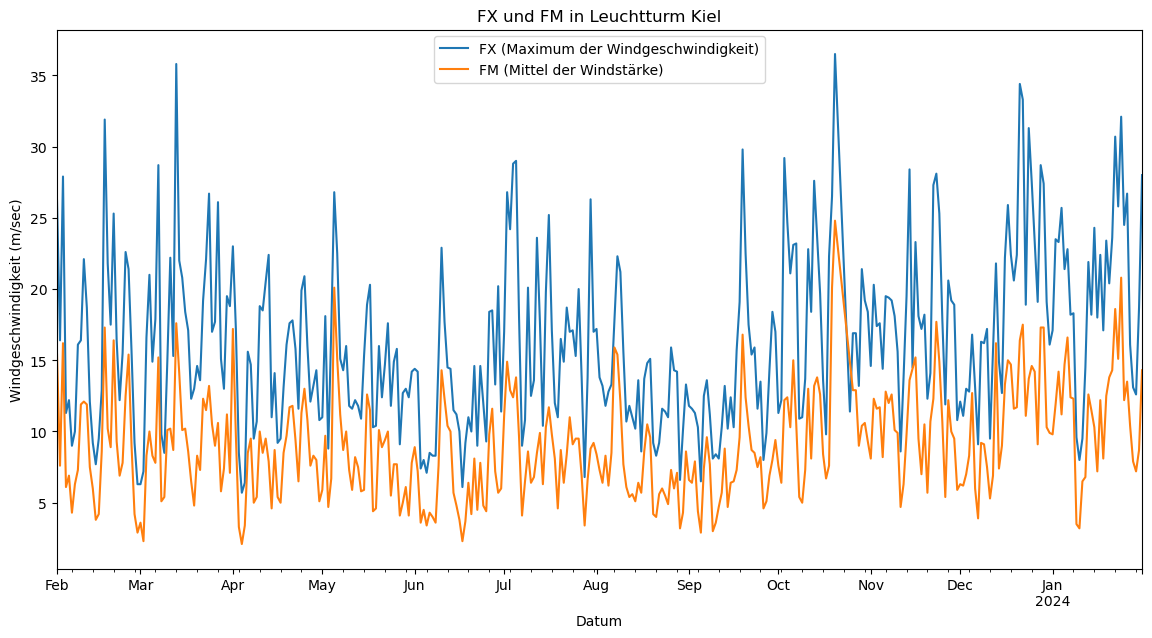

In [81]:
plt.figure(figsize=(14, 7)) 
KL_jahr[['FX', 'FM']].plot(title='FX und FM in Leuchtturm Kiel', ax=plt.gca()) 
plt.xlabel('Datum') 
plt.ylabel('Windgeschwindigkeit (m/sec)') 
plt.legend(['FX (Maximum der Windgeschwindigkeit)', 'FM (Mittel der Windstärke)']) 
plt.show()

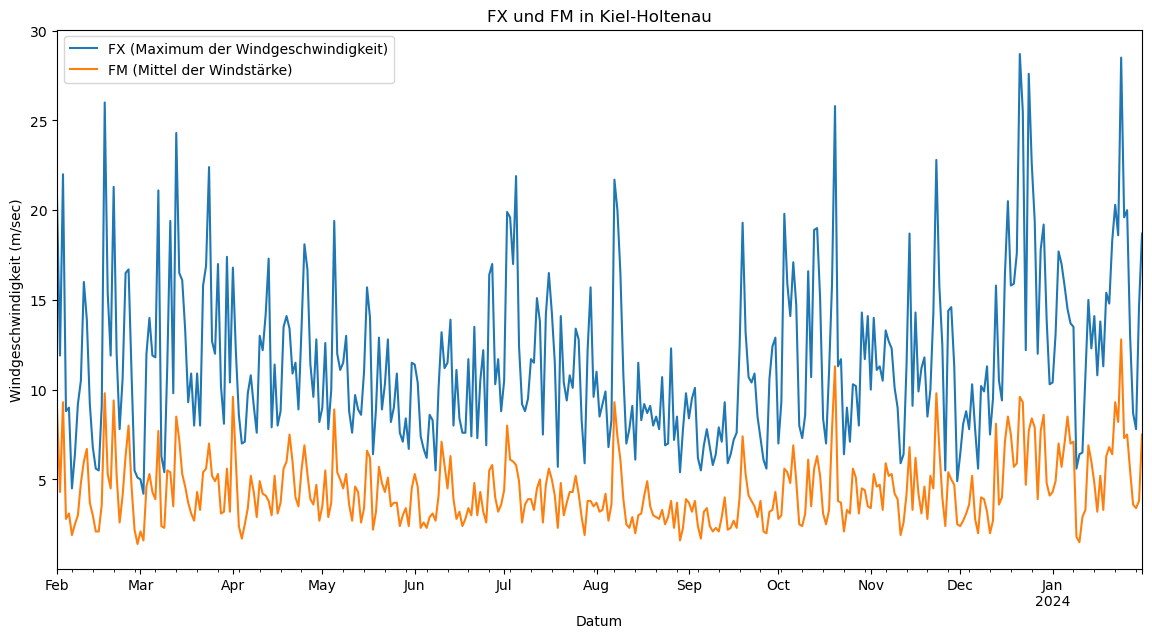

In [82]:
plt.figure(figsize=(14, 7)) 
KH_jahr[['FX', 'FM']].plot(title='FX und FM in Kiel-Holtenau', ax=plt.gca()) 
plt.xlabel('Datum') 
plt.ylabel('Windgeschwindigkeit (m/sec)') 
plt.legend(['FX (Maximum der Windgeschwindigkeit)', 'FM (Mittel der Windstärke)']) 
plt.show()

#### Vergleich des Maximum der Windgeschwindigkeit

Zunächst plotten wir das Maximum der Windgeschwindigkeiten beider Stationen. 

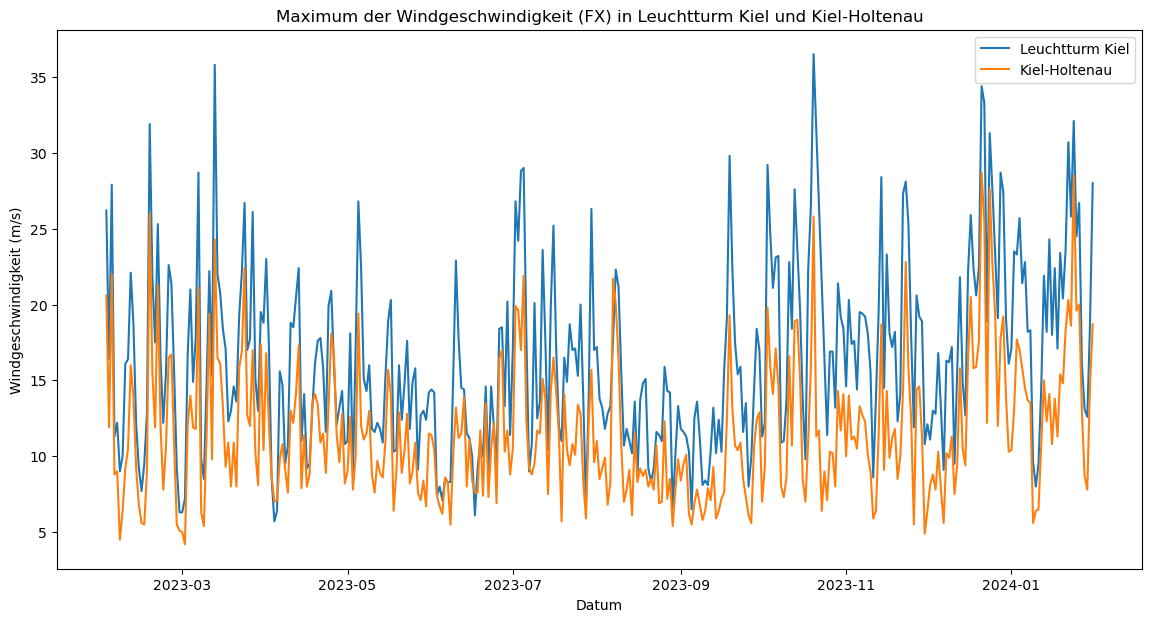

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(KL_jahr.index, KL_jahr['FX'], label='Leuchtturm Kiel')
plt.plot(KH_jahr.index, KH_jahr['FX'], label='Kiel-Holtenau')
plt.title('Maximum der Windgeschwindigkeit (FX) in Leuchtturm Kiel und Kiel-Holtenau')
plt.xlabel('Datum')
plt.ylabel('Windgeschwindigkeit (m/s)')
plt.legend()
plt.show()

Auf den ersten Blick scheint das Maximum der Windgeschwindigkeit in Leuchtturm Kiel häufig über den gemessenen Werten in Kiel-Holtenau zu liegen. Folgend werden wir auch hier die Differenz der beiden Stationen berechnen. Dafür ziehen wir die Werte der Station Kiel-Holtenau von den Werten der Station Leuchtturm Kiel ab. In dem Plot sieht man, dass an der Station Leuchtturm Kiel viele Male deutlich höhere Windgeschwindigkeiten als in Kiel-Holtenau erreicht wurden.

In [87]:
fx_differenz = KL_jahr['FX'] - KH_jahr['FX'].reindex(KL_jahr.index)

fx_vergleich = pd.DataFrame({
    'Datum': KL_jahr.index,
    'FX_Leuchtturm': KL_jahr['FX'],
    'FX_Holtenau': KH_jahr['FX'].reindex(KL_jahr.index),
    'Differenz_FM': fx_differenz
})
print(fx_vergleich)

                Datum  FX_Leuchtturm  FX_Holtenau  Differenz_FM
Datum                                                          
2023-02-01 2023-02-01           26.2         20.6           5.6
2023-02-02 2023-02-02           16.4         11.9           4.5
2023-02-03 2023-02-03           27.9         22.0           5.9
2023-02-04 2023-02-04           11.3          8.8           2.5
2023-02-05 2023-02-05           12.2          9.0           3.2
...               ...            ...          ...           ...
2024-01-27 2024-01-27           16.1         13.0           3.1
2024-01-28 2024-01-28           13.1          8.7           4.4
2024-01-29 2024-01-29           12.6          7.8           4.8
2024-01-30 2024-01-30           18.7         14.7           4.0
2024-01-31 2024-01-31           28.0         18.7           9.3

[365 rows x 4 columns]


In [88]:
fx_differenz.mean()

4.796986301369863

Das Ergebnis zeigt, dass das Maximum der Windgeschwindigkeit in Leuchtturm Kiel durchschnittlich um 4,8 m/sec höher ist als in Kiel-Holtenau.

Von dem obigen Plot kann man nur ungefähre Zeiträume und keine genauen Tage ablesen. Schauen wir uns aus Interesse beispielsweise konkret den Oktober der Station Leuchtturm Kiel an, da dort ein hoher Ausschlag liegt.

In [91]:
KL_oktober = KL_jahr['2023-10-01':'2023-10-31']
KL_oktober

,FX,FM,TM,TX,TN
Datum,,,,,
2023-10-01,11.30,7.600000,15.3,16.7,13.5
2023-10-02,12.20,6.400000,17.7,20.6,16.2
2023-10-03,29.20,12.200000,16.3,20.0,11.3
2023-10-04,24.70,12.400000,14.3,16.5,12.8
2023-10-05,21.10,10.300000,14.5,16.8,11.6
2023-10-06,23.10,15.000000,15.3,17.7,13.5
2023-10-07,23.20,10.500000,13.6,17.2,11.3
2023-10-08,10.90,5.400000,12.2,13.1,10.2
2023-10-09,11.00,5.000000,10.8,12.9,9.1


In [92]:
KL_jahr.max()

FX    36.5
FM    24.8
TM    23.5
TX    28.5
TN    18.8
dtype: float64

In [93]:
KH_jahr.max()

FX    28.7
FM    12.8
TM    24.0
TX    30.0
TN    17.7
dtype: float64

Durch die Abfrage der Monatswerte im Oktober konnte die höchste Windgeschwindigkeit mit 36,5 m/sec der Station Leuchtturm Kiel dem 20. Oktober 2023 zugeordnet werden. Dies könnte auch die Fehlwerte in den darauffolgenden Tagen bei "FM" und "FX" an diesem Standort erklären. Laut dem DWD bezeichnet man Windgeschwindigkeiten ab 32,7 als Orkan⁴. Womöglich wurde das Messgerät bei dem Orkan beschädigt. Bei der Station Kiel-Holtenau wurde im Vergleich dazu nur ein Peak von 28,7 m/s erreicht.

#### Vergleich der Windstärke der Stationen

Zuletzt vergleichen wir noch das Mittel der Windstärke, also die mittlere Windgeschwindigkeit, der beiden Stationen.

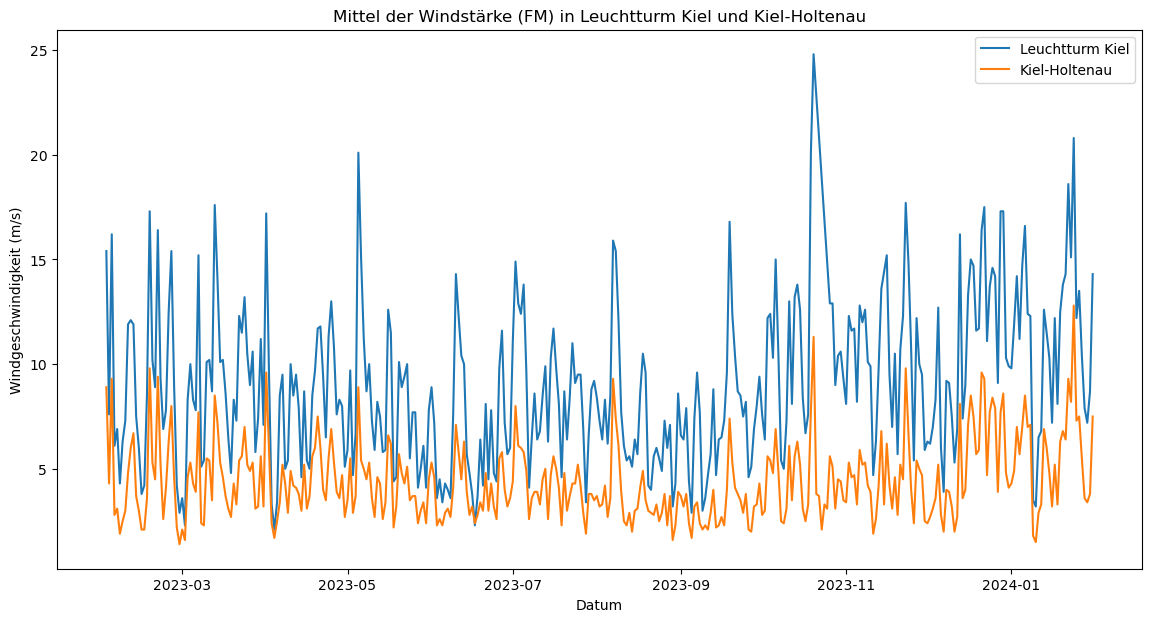

In [97]:
plt.figure(figsize=(14, 7)) 
plt.plot(KL_jahr.index, KL_jahr['FM'], label='Leuchtturm Kiel') 
plt.plot(KH_jahr.index, KH_jahr['FM'], label='Kiel-Holtenau') 
plt.title('Mittel der Windstärke (FM) in Leuchtturm Kiel und Kiel-Holtenau') 
plt.xlabel('Datum') 
plt.ylabel('Windgeschwindigkeit (m/s)') 
plt.legend() 
plt.show()

Im Plot erkennen wir bereits, dass die Werte, wie auch bei dem Maximum der Windgeschwindikeit, deutlich auseinander liegen. Zur Bestätigung der Beobachtung berechnen wir auch hier die Differenz zwischen den Werten der beiden Stationen.

In [99]:
fm_differenz = KL_jahr['FM'] - KH_jahr['FM'].reindex(KL_jahr.index)

fm_vergleich = pd.DataFrame({
    'Datum': KL_jahr.index,
    'FM_Leuchtturm': KL_jahr['FM'],
    'FM_Holtenau': KH_jahr['FM'].reindex(KL_jahr.index),
    'Differenz_FM': fm_differenz
})
print(fm_vergleich)

                Datum  FM_Leuchtturm  FM_Holtenau  Differenz_FM
Datum                                                          
2023-02-01 2023-02-01           15.4          8.9           6.5
2023-02-02 2023-02-02            7.6          4.3           3.3
2023-02-03 2023-02-03           16.2          9.3           6.9
2023-02-04 2023-02-04            6.1          2.8           3.3
2023-02-05 2023-02-05            6.9          3.1           3.8
...               ...            ...          ...           ...
2024-01-27 2024-01-27           10.4          5.5           4.9
2024-01-28 2024-01-28            7.9          3.6           4.3
2024-01-29 2024-01-29            7.2          3.4           3.8
2024-01-30 2024-01-30            8.7          3.8           4.9
2024-01-31 2024-01-31           14.3          7.5           6.8

[365 rows x 4 columns]


In [100]:
fm_differenz.mean()

4.73904109589041

Das rechnerische Ergebnis sagt aus, dass die mittlere Windgeschwindigkeit an der Station Leuchtturm Kiel ca. 4,7 m/s höher ist als an der Station in Kiel-Holtenau. Somit bestätigt sich die 2. Hypothese.

#### Fazit zur 2. Hypothese



Sowohl die durchschnittliche Differenz im Maximum der Windgeschwindigkeit als auch die durchschnittliche Differenz der mittleren Windgeschwindigkeit zeigen, dass die Windgeschwindigkeiten in Leuchtturm Kiel über denen in Kiel-Holtenau liegen. Somit lässt sich die 2. Hypothese bestätigen: Die durchschnittliche Windgeschwindigkeit ist auf dem Meer höher als in der Stadt.

### Quellen

¹ Rudolph, A., Krois, J., Hartmann, K. (2023): Statistics and Geodata Analysis using Python (SOGA-Py). Department of Earth Sciences, Freie Universitaet Berlin.

² Deutscher Wetterdienst. *Klimadaten Deutschland - Monats- und Tageswerte (Archiv)*. Abgerunfen unter: https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html [16.07.2024]

³ Deutscher Wetterdienst. *Informationen zu den Tages- und Monatswerten*. Abgerufen unter: https://www.dwd.de/DE/leistungen/klimadatendeutschland/beschreibung_tagesmonatswerte.html;jsessionid=A4B768F1F0C84C3C90E869302AE2E49F.live11054?nn=16102&lsbId=526270 [21.07.2024]

⁴ Deutscher Wetterdienst. Wetter- und Klimalexikon - Beaufort-Skala. Abgerufen unter: https://www.dwd.de/DE/service/lexikon/Functions/glossar.html?lv3=100390&lv2=100310 [21.07.2024]

ChatGPT, aufgerufen unter: https://chatgpt.com/